In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [2]:
df = pd.read_csv( './abr2019.csv')
df.head(20)

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc
0,04/14/19 00:00:00,12/30/99 02:29:00,04/14/19 00:00:00,12/30/99 02:30:00,Ida,100,271,12/30/99 00:01:00,0,0.000
1,04/14/19 00:00:00,12/30/99 03:30:00,04/14/19 00:00:00,12/30/99 03:30:00,Ida,100,271,12/30/99 00:00:00,0,0.000
2,04/13/19 00:00:00,12/30/99 01:28:00,04/13/19 00:00:00,12/30/99 01:28:00,Ida,100,276,12/30/99 00:00:00,0,0.000
3,04/12/19 00:00:00,12/30/99 03:28:00,04/12/19 00:00:00,12/30/99 03:28:00,Ida,100,279,12/30/99 00:00:00,0,0.000
4,04/07/19 00:00:00,12/30/99 00:31:00,04/07/19 00:00:00,12/30/99 00:31:00,Ida,100,273,12/30/99 00:00:00,0,0.000
5,04/02/19 00:00:00,12/30/99 01:27:00,04/02/19 00:00:00,12/30/99 01:27:00,Ida,100,276,12/30/99 00:00:00,0,0.000
6,05/01/19 00:00:00,12/30/99 00:31:00,05/01/19 00:00:00,12/30/99 01:34:00,Volta,100,276,12/30/99 01:03:00,3,16.308
7,05/01/19 00:00:00,12/30/99 01:35:00,05/01/19 00:00:00,12/30/99 02:36:00,Volta,100,276,12/30/99 01:01:00,10,16.308
8,05/01/19 00:00:00,12/30/99 02:36:00,05/01/19 00:00:00,12/30/99 03:06:00,Volta,100,276,12/30/99 00:30:00,8,16.308
9,05/01/19 00:00:00,12/30/99 03:30:00,05/01/19 00:00:00,12/30/99 04:30:00,Volta,100,276,12/30/99 01:00:00,7,16.308


<Axes: >

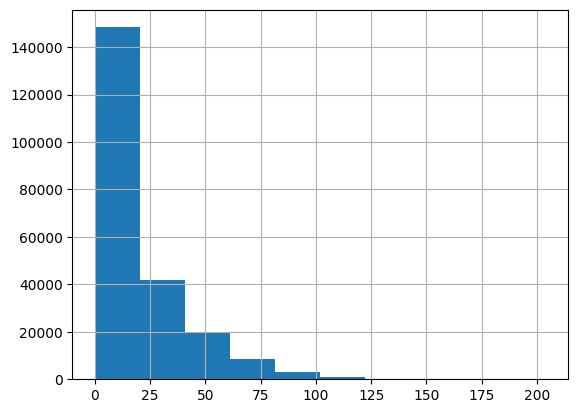

In [3]:
df["TotalGiros"].hist()

In [3]:
# Quantidade de corridas por hora
df['HoraIni2'] = pd.to_datetime(df['HoraIni'], errors='coerce').dt.hour
# df['HoraIni2'].plot.hist()
df['HoraIni2']

/tmp/ipykernel_16827/818884351.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HoraIni2'] = pd.to_datetime(df['HoraIni'], errors='coerce').dt.hour


0          2
1          3
2          1
3          3
4          0
          ..
223397    11
223398    12
223399    16
223400    11
223401    16
Name: HoraIni2, Length: 223402, dtype: int32

In [5]:
novo = df.groupby(["HoraIni2", "Linha"]).sum("TotalGiros")
novo[["TotalGiros"]]

TotalGiros
HoraIni2 Linha            
0        100           333
         132            16
         133            14
         134           121
         135            62
...                    ...
23       850             0
         M233         1014
         M250           65
         M273           62
         M940           51

[2901 rows x 1 columns]

In [4]:
# df.groupby("Linha").first()
# df["Linha"].unique()
df["Linha2"] = pd.Series(df["Linha"]).astype('category').cat.codes+1
df["Sentido2"] = pd.Series(df["Sentido"]).astype('category').cat.codes
df.head()
df[["Linha2", "HoraIni2", "TotalGiros", "Sentido2"]]

,Linha2,HoraIni2,TotalGiros,Sentido2
0,1,2,0,0
1,1,3,0,0
2,1,1,0,0
3,1,3,0,0
4,1,0,0,0
...,...,...,...,...
223397,205,11,75,1
223398,205,12,0,1
223399,205,16,78,1
223400,205,11,74,1


In [5]:
# pd.to_datetime(df['HoraIni'], errors='coerce', format="%Y-%m-%d %H:%M:%S")
# df['MinutoIni'] = pd.to_datetime(df['HoraIni'], errors='coerce').dt.hour
df['MinutoIni'] = pd.to_datetime(df['HoraIni'], errors='coerce').dt.time.astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df['MinutoIni']

/tmp/ipykernel_16827/3865273128.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MinutoIni'] = pd.to_datetime(df['HoraIni'], errors='coerce').dt.time.astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))


0          149
1          210
2           88
3          208
4           31
          ... 
223397     707
223398     748
223399    1005
223400     706
223401    1009
Name: MinutoIni, Length: 223402, dtype: int64

In [6]:
params = df[0:10_000][['HoraIni2', 'Linha2', 'Sentido2']]
target = df[0:10_000]['TotalGiros']

params_train, params_test, target_train, target_test = train_test_split(
              params, target, 
              test_size=0.2,
              random_state=1, 
              shuffle=True
              )

model = svm.SVR(kernel="rbf", C=1, gamma=0.1, epsilon=0.1).fit(params_train, target_train)
target_prediction = model.predict(params_test)

print("MSE", metrics.mean_squared_error(target_test, target_prediction))
print("MDA", metrics.mean_absolute_error(target_test, target_prediction))

MSE 63.88057618992578
MDA 4.490788774926916


In [7]:
params = df[0:10_000][['MinutoIni', 'Linha2', 'Sentido2']]
target = df[0:10_000]['TotalGiros']

params_train, params_test, target_train, target_test = train_test_split(
              params, target, 
              test_size=0.2,
              random_state=1, 
              shuffle=True
              )

model = svm.SVR(kernel="rbf", C=1, gamma=0.1, epsilon=0.1).fit(params_train, target_train)
target_prediction = model.predict(params_test)

print("MSE", metrics.mean_squared_error(target_test, target_prediction))
print("MDA", metrics.mean_absolute_error(target_test, target_prediction))

MSE 77.58197393599627
MDA 5.382381220715624
